In [2]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import NV
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import pandas as pd

In [3]:
def ODMR_theory(B,theta,D):
    g = 28E6 #MHz/mT, B should be in mT
    
    f_0 = D + 3*g**2*B**2/(2*D)*np.sin(theta)**2
    f_1 = g*B*np.cos(theta)*np.sqrt( 1 + (g*B/(2*D)*np.tan(theta)*np.sin(theta))**2)
    
    return f_0-f_1

In [4]:
def ODMR_Analyze(files,theta):
    bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
    bsweep = np.nan_to_num(bsweep)
    diffs = bsweep[:,1::2]
    Bs = np.linspace(0,1,len(files))*(11/0.5)


    freq = bsweep[:,2]
    fits = np.zeros((diffs.shape[1],12))
    for i in range(0,diffs.shape[1]):
        O = diffs[:,i]*100
        opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
        fits[i,:6] = opt
        fits[i,6:] = np.sqrt(np.diag(cov))

    mask = (fits[:,1]<fits[:,4])
    mins = fits[:,1]*mask + fits[:,4]*~mask
    mins_err = fits[:,7]*mask + fits[:,10]*~mask
    maxs = fits[:,1]*~mask + fits[:,4]*mask
    maxs_err = fits[:,7]*~mask + fits[:,10]*mask

    m = mins_err>3E6
    Bs_n = Bs[~m]
    mins = mins[~m]
    mins_err = mins_err[~m]
    m = maxs_err>3E6
    Bs_x = Bs[~m]
    maxs = maxs[~m]
    maxs_err = maxs_err[~m]

    b_f = np.hstack((-Bs_n,Bs_x))
    f = np.hstack((mins,maxs))

    print "Pol. pred: %.2f" % (theta*180/np.pi)

    opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,mins[0]])
    print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi,np.sqrt(np.diag(cov))[0]*180/np.pi)
    print "diff: %.2f" % ((opt[0]-theta)*180/np.pi)
    plt.plot(Bs_n,mins,'ko')
    plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
    plt.plot(Bs_x,maxs,'ko')
    plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
    plt.show()

    #plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
    #plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
    plt.errorbar(Bs_n,(mins-ODMR_theory(-Bs_n,*opt))/(28E6),
                 yerr=mins_err/28E6,marker='o',ls=':',color='b')
    plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
                 yerr=maxs_err/28E6,marker='o',ls=':',color='r')
    plt.xlabel('B_ext(mT)',fontsize=20)
    plt.ylabel('$\Delta B$ (mT)',fontsize=20)
    plt.show()

# MNP coupled ND, dot 1

Pol. pred: 143.54
ODMR pred: 119.80 +/- 0.33
diff: -23.74


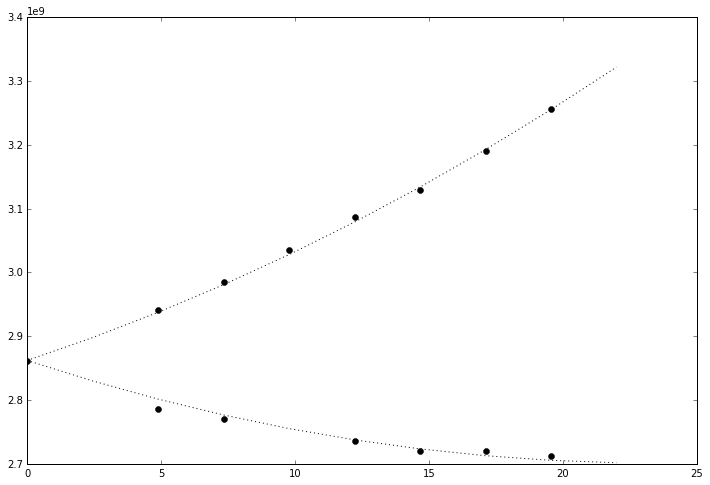

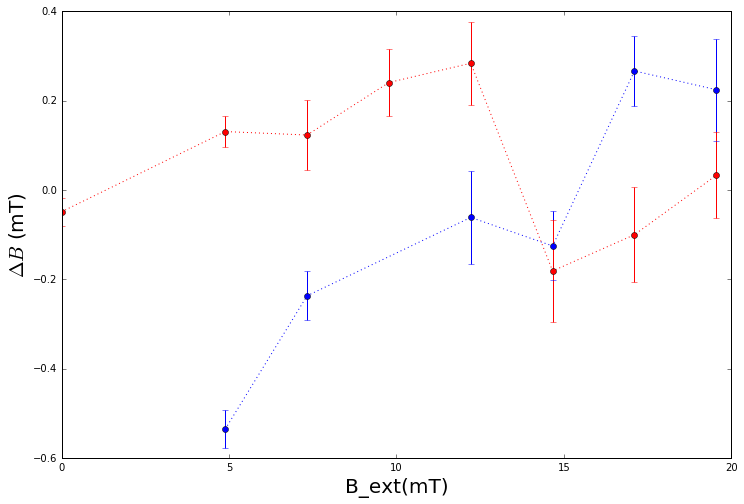

In [115]:
phi_0 = (153+13.8)*np.pi/180
th_0 = (46.7+9)*np.pi/180
theta = np.arccos(np.cos(phi_0)*np.sin(th_0))

files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-18-16\MNP 2 wash on CPW 5mW scan 3 x103 y54 ODMR T0 *V.txt')
ODMR_Analyze(files,theta)

Pol. pred: 79.13
ODMR pred: 110.87 +/- 0.37
diff: 31.74


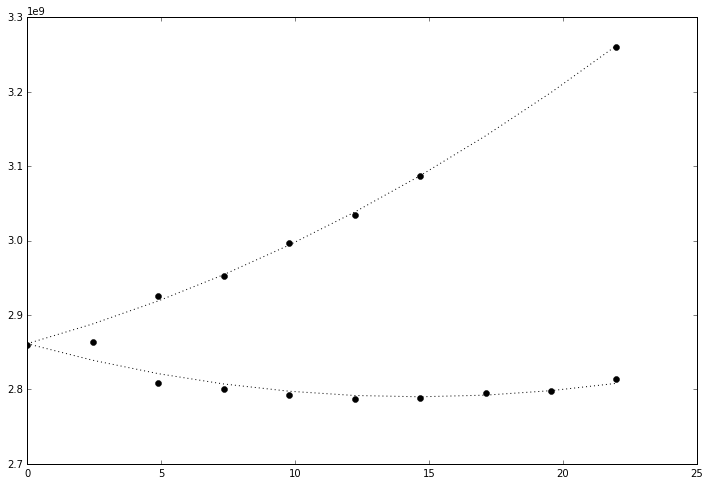

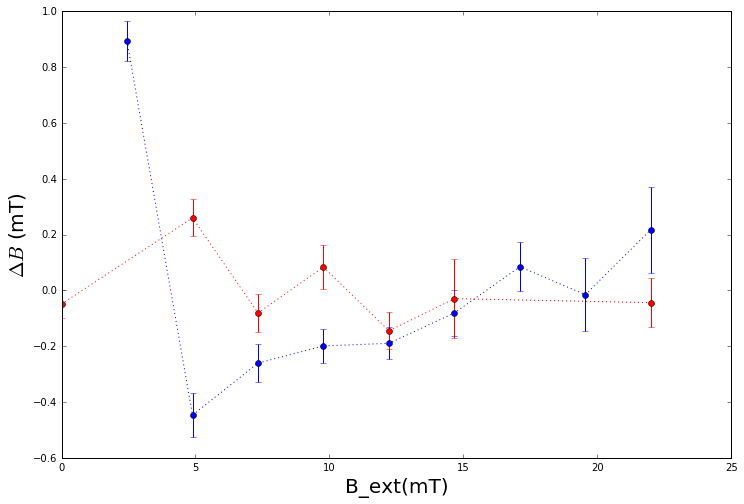

In [116]:
phi_0 = (153+13.8)*np.pi/180
th_0 = (46.7+9)*np.pi/180
theta = np.arccos(np.sin(phi_0)*np.sin(th_0))


files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-18-16\MNP 2 wash on CPW 5mW scan 3 x103 y54 ODMR T90 *V.txt')
ODMR_Analyze(files,theta)

Pol. pred: 55.70
ODMR pred: 158.29 +/- 0.77
diff: 102.59


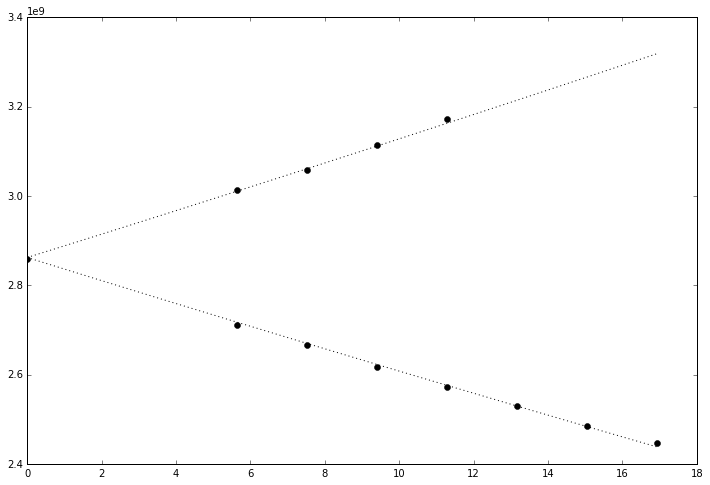

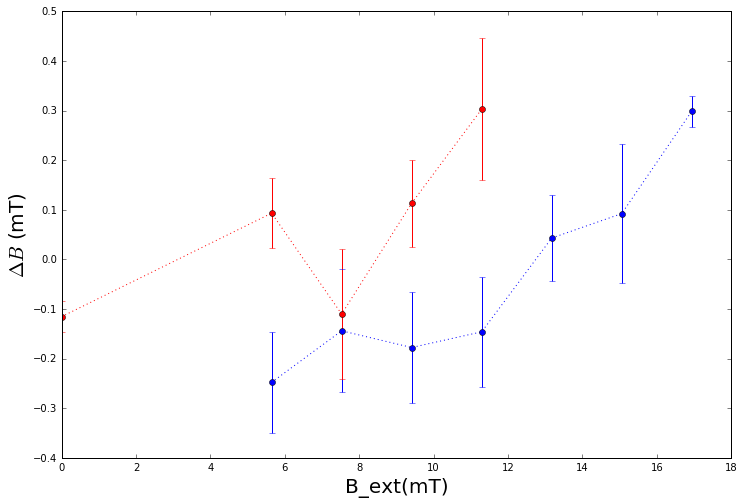

In [117]:
phi_0 = (153+13.8)*np.pi/180
th_0 = (46.7+9)*np.pi/180
theta = th_0


files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-18-16\MNP 2 wash on CPW 5mW scan 3 x103 y54 ODMR d15_4 T0 *V.txt')
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,1,len(files))*(11/0.5)*.77


freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],12))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]*100
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:6] = opt
    fits[i,6:] = np.sqrt(np.diag(cov))
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
mins_err = fits[:,7]*mask + fits[:,10]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
maxs_err = fits[:,7]*~mask + fits[:,10]*mask

m = mins_err>4.5E6
Bs_n = Bs[~m]
mins = mins[~m]
mins_err = mins_err[~m]
m = maxs_err>5E6
Bs_x = Bs[~m]
maxs = maxs[~m]
maxs_err = maxs_err[~m]

b_f = np.hstack((-Bs_n,Bs_x))
f = np.hstack((mins,maxs))

print "Pol. pred: %.2f" % (theta*180/np.pi)

opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,maxs[0]])
print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi,np.sqrt(np.diag(cov))[0]*180/np.pi)
print "diff: %.2f" % ((opt[0]-theta)*180/np.pi)
plt.plot(Bs_n,mins,'ko')
plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
plt.plot(Bs_x,maxs,'ko')
plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
plt.show()

#plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
#plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
plt.errorbar(Bs_n,(mins-ODMR_theory(-Bs_n,*opt))/(28E6),
             yerr=mins_err/28E6,marker='o',ls=':',color='b')
plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
             yerr=maxs_err/28E6,marker='o',ls=':',color='r')
plt.xlabel('B_ext(mT)',fontsize=20)
plt.ylabel('$\Delta B$ (mT)',fontsize=20)
plt.show()

In [118]:
x_o = np.cos(120*np.pi/180)
y_o = np.cos(111*np.pi/180)
phi_o = np.arctan(y_o/x_o)
th_o = 158

phi_0 = (153+13.8)
th_0 = (46.7+9)

print "Phi Pol.: %.2f or %.2f" % (phi_0-180,phi_0)
print "Phi ODMR: %.2f or %.2f" % (phi_o*np.pi/180,phi_o*np.pi/180-180)

print "Theta Pol.: %.2f or %.2f" % (th_0,180-th_0)
print "Theta ODMR: %.2f or %.2f" % (180-th_o,th_o)

Phi Pol.: -13.20 or 166.80
Phi ODMR: 0.01 or -179.99
Theta Pol.: 55.70 or 124.30
Theta ODMR: 22.00 or 158.00


# MNP Dot 2

Pol. pred: 36.91
ODMR pred: 94.90 +/- 0.68
diff: 57.99


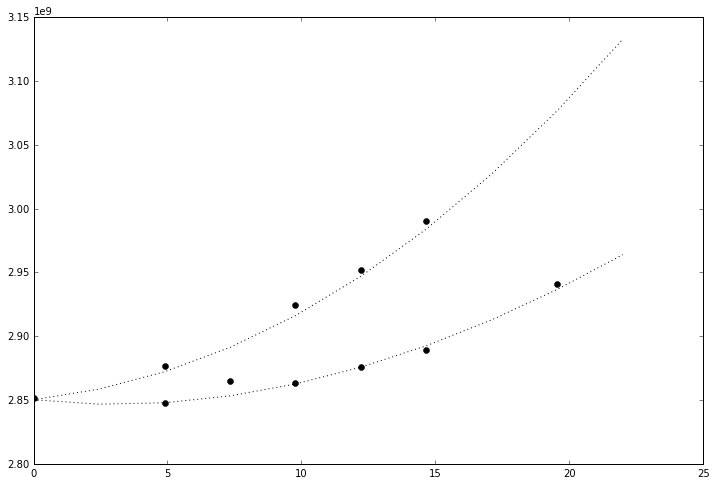

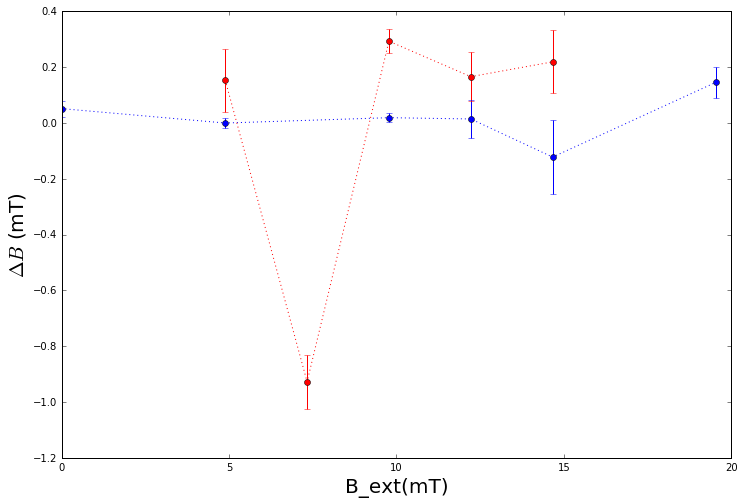

In [119]:
phi_0 = (6.85+13.8)*np.pi/180
th_0 = (34.5+9)*np.pi/180
theta = np.cos(phi_0)*np.sin(th_0)

files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-18-16\MNP 2 wash on CPW 5mW scan 3 x10 y88 T0 *V.txt')
ODMR_Analyze(files,theta)

Pol. pred: 13.91
ODMR pred: 255.35 +/- 0.34
diff: 241.44


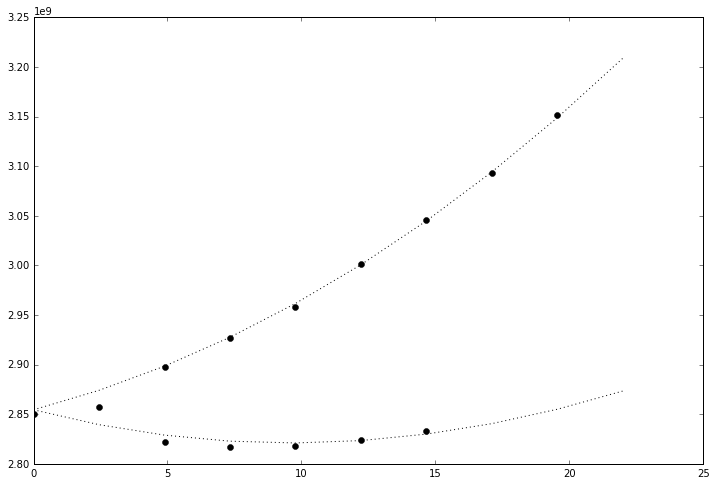

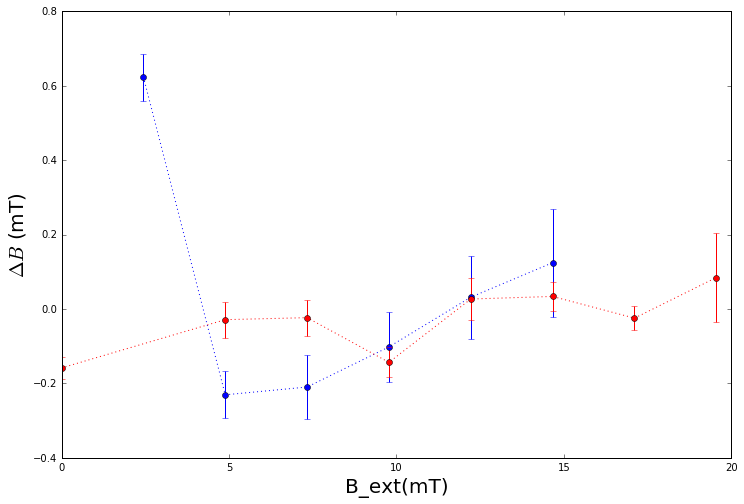

In [120]:
phi_0 = (6.85+13.8)*np.pi/180
th_0 = (34.5+9)*np.pi/180
theta = np.sin(phi_0)*np.sin(th_0)

files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-19-16\MNP #2 wash 2 CPW 5mW scan 1 x0 y68 T90 *V.txt')
ODMR_Analyze(files,theta)

Pol. pred: 43.50
ODMR pred: 180.00 +/- 20998390.86
diff: 136.50


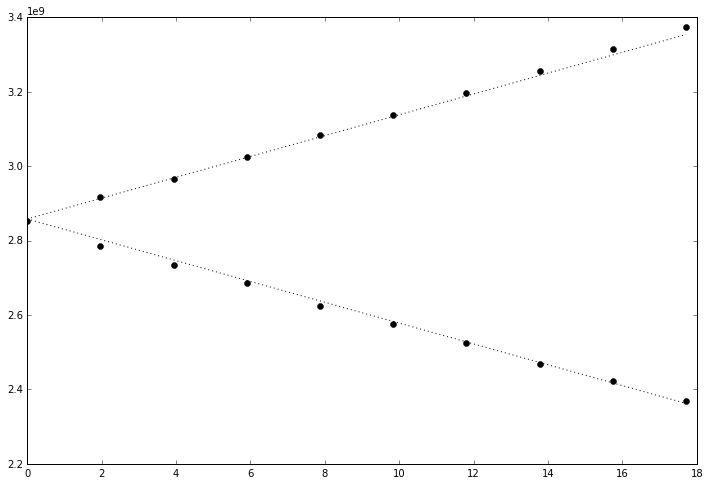

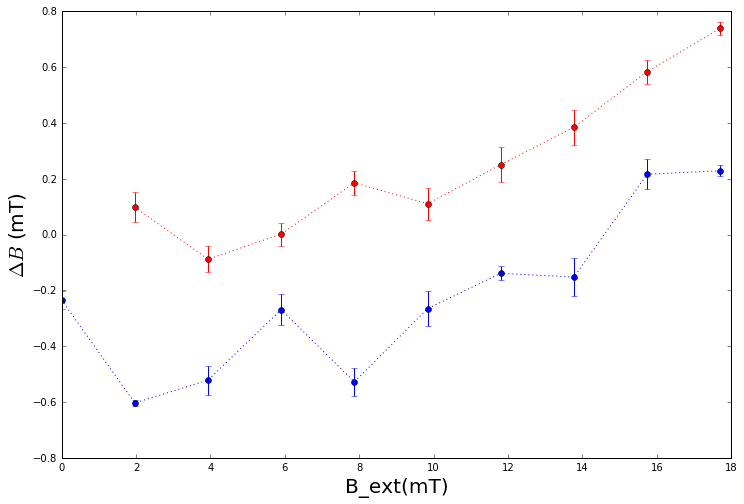

In [121]:
phi_0 = (6.85+13.8)*np.pi/180
th_0 = (34.5+9)*np.pi/180
theta = th_0

files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-18-16\MNP 2 wash on CPW 5mW scan 3 x10 y88 d15_4 T0 *V.txt')
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,1,len(files))*(11.5/0.5)*0.77


freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],12))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]*100
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:6] = opt
    fits[i,6:] = np.sqrt(np.diag(cov))
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
mins_err = fits[:,7]*mask + fits[:,10]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
maxs_err = fits[:,7]*~mask + fits[:,10]*mask

m = mins_err>4.5E6
Bs_n = Bs[~m]
mins = mins[~m]
mins_err = mins_err[~m]
m = maxs_err>5E6
Bs_x = Bs[~m]
maxs = maxs[~m]
maxs_err = maxs_err[~m]

b_f = np.hstack((-Bs_n,Bs_x))
f = np.hstack((mins,maxs))

print "Pol. pred: %.2f" % (theta*180/np.pi)

opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,maxs[0]])
print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi,np.sqrt(np.diag(cov))[0]*180/np.pi)
print "diff: %.2f" % ((opt[0]-theta)*180/np.pi)
plt.plot(Bs_n,mins,'ko')
plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
plt.plot(Bs_x,maxs,'ko')
plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
plt.show()

#plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
#plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
plt.errorbar(Bs_n,(mins-ODMR_theory(-Bs_n,*opt))/(28E6),
             yerr=mins_err/28E6,marker='o',ls=':',color='b')
plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
             yerr=maxs_err/28E6,marker='o',ls=':',color='r')
plt.xlabel('B_ext(mT)',fontsize=20)
plt.ylabel('$\Delta B$ (mT)',fontsize=20)
plt.show()

In [122]:
x_o = np.cos(95*np.pi/180)
y_o = np.cos(255*np.pi/180)
phi_o = np.arctan(y_o/x_o)
th_o = 180

phi_0 = (6.85+13.8)
th_0 = (34.5+9)

print "Phi Pol.: %.2f or %.2f" % (phi_0-180,phi_0)
print "Phi ODMR: %.2f or %.2f" % (phi_o*np.pi/180-180,phi_o*np.pi/180)

print "Theta Pol.: %.2f or %.2f" % (th_0,180-th_0)
print "Theta ODMR: %.2f or %.2f" % (180-th_o,th_o)

Phi Pol.: -159.35 or 20.65
Phi ODMR: -179.98 or 0.02
Theta Pol.: 43.50 or 136.50
Theta ODMR: 0.00 or 180.00


Pol. pred: 0.10
ODMR pred: 166.73 +/- 0.36
diff: 166.63


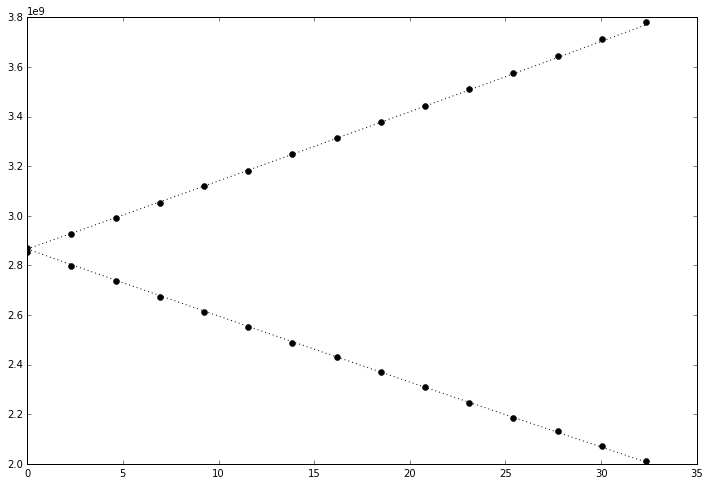

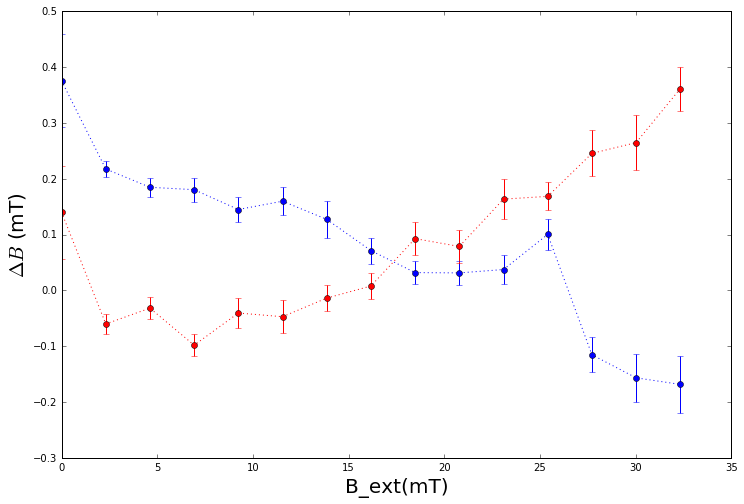

In [194]:
theta = 0.1*np.pi/180
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\8-6-16\MNP #2 wash CPW 5mW scan 2 x125 y92 T138.8  d_-5.3 *V.txt')
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,1.47,len(files))*(11/0.5)


freq = bsweep[:,0]
fits = np.zeros((diffs.shape[1],12))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]*100
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E10,freq[np.argmin(O)],6E7,-4E10,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:6] = opt
    fits[i,6:] = np.sqrt(np.diag(cov))
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
mins_err = fits[:,7]*mask + fits[:,10]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
maxs_err = fits[:,7]*~mask + fits[:,10]*mask

m = mins_err>4.5E6
Bs_n = Bs[~m]
mins = mins[~m]
mins_err = mins_err[~m]
m = maxs_err>5E6
Bs_x = Bs[~m]
maxs = maxs[~m]
maxs_err = maxs_err[~m]

b_f = np.hstack((-Bs_n,Bs_x))
f = np.hstack((mins,maxs))

print "Pol. pred: %.2f" % (theta*180/np.pi)

opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,maxs[0]])
print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi%180,np.sqrt(np.diag(cov))[0]*180/np.pi%180)
print "diff: %.2f" % ((opt[0]-theta)*180/np.pi%180)
plt.plot(Bs_n,mins,'ko')
plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
plt.plot(Bs_x,maxs,'ko')
plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
plt.show()

#plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
#plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
plt.errorbar(Bs_n,(ODMR_theory(-Bs_n,*opt)-mins)/(28E6),
             yerr=mins_err/28E6,marker='o',ls=':',color='b')
plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
             yerr=maxs_err/28E6,marker='o',ls=':',color='r')
plt.xlabel('B_ext(mT)',fontsize=20)
plt.ylabel('$\Delta B$ (mT)',fontsize=20)
plt.show()

Pol. pred: 3.00
ODMR pred: 180.00 +/- 14462809.88
diff: 177.00


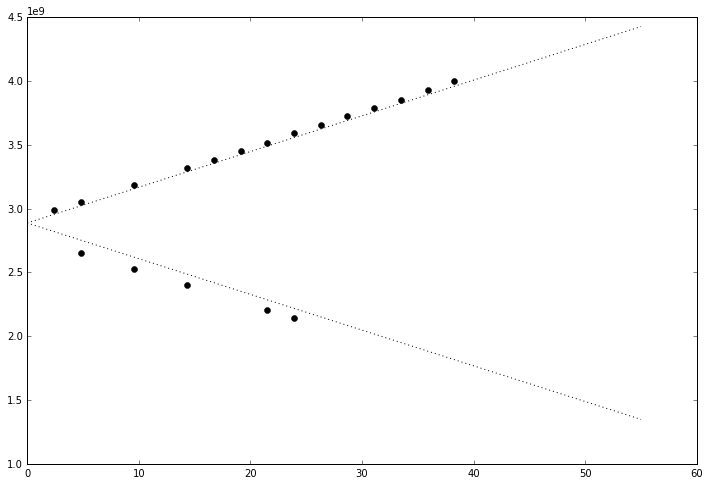

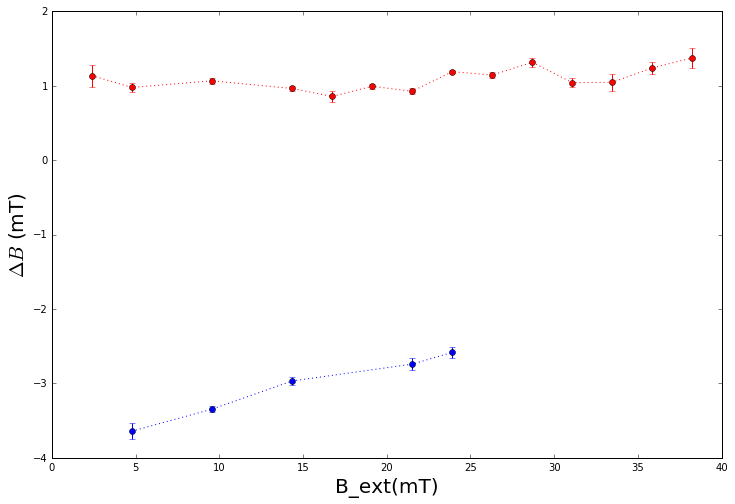

In [5]:
theta = 3*np.pi/180
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 T-63.2 d_1.55 *V.txt')

bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,2.5,len(files))*(11/0.5)


freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],12))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]*100
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:6] = opt
    fits[i,6:] = np.sqrt(np.diag(cov))
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
mins_err = fits[:,7]*mask + fits[:,10]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
maxs_err = fits[:,7]*~mask + fits[:,10]*mask

m = mins_err>6E6
Bs_n = Bs[~m]
mins = mins[~m]
mins_err = mins_err[~m]
m = maxs_err>6E6
Bs_x = Bs[~m]
maxs = maxs[~m]
maxs_err = maxs_err[~m]

b_f = np.hstack((-Bs_n,Bs_x))
f = np.hstack((mins,maxs))

print "Pol. pred: %.2f" % (theta*180/np.pi)

opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,2.865E9])
print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi%180,np.sqrt(np.diag(cov))[0]*180/np.pi)
print "diff: %.2f" % ((opt[0]-theta)*180/np.pi%180)
plt.plot(Bs_n,mins,'ko')
plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
plt.plot(Bs_x,maxs,'ko')
plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
plt.show()

#plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
#plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
plt.errorbar(Bs_n,(mins-ODMR_theory(-Bs_n,*opt))/(28E6),
             yerr=mins_err/28E6,marker='o',ls=':',color='b')
plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
             yerr=maxs_err/28E6,marker='o',ls=':',color='r')
plt.xlabel('B_ext(mT)',fontsize=20)
plt.ylabel('$\Delta B$ (mT)',fontsize=20)
plt.show()

# Nabond Bare ND

Pol. pred: 3.00
ODMR pred: 0.00 +/- 137.75
diff: 177.00


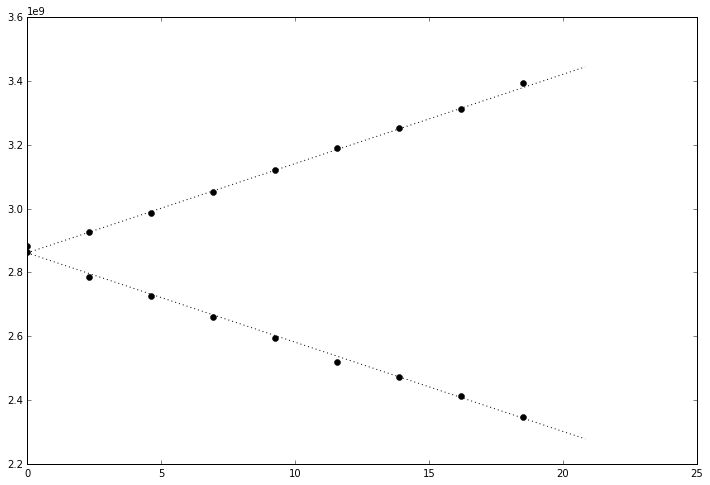

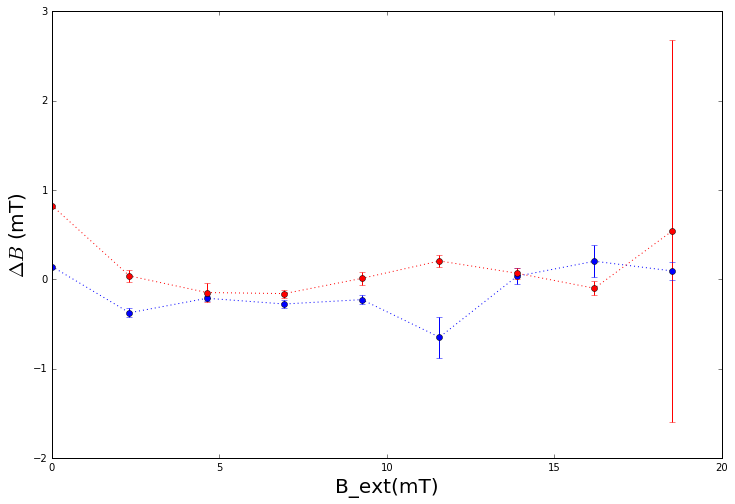

In [181]:
theta = 3*np.pi/180
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\5-28-16\Nabond on CPW 5mW scan 2 Dot 1 x82 y85 T65 d5_1 *V.txt')

bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,0.947,len(files))*(11/0.5)


freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],12))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:6] = opt
    fits[i,6:] = np.sqrt(np.diag(cov))
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
mins_err = fits[:,7]*mask + fits[:,10]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
maxs_err = fits[:,7]*~mask + fits[:,10]*mask

m = mins_err>10E6
Bs_n = Bs[:-1]
mins = mins[:-1]
mins_err = mins_err[:-1]
m = maxs_err>10E6
Bs_x = Bs[:-1]
maxs = maxs[:-1]
maxs_err = maxs_err[:-1]

b_f = np.hstack((-Bs_n,Bs_x))
f = np.hstack((mins,maxs))

print "Pol. pred: %.2f" % (theta*180/np.pi)

opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,2.865E9])
print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi%180,np.sqrt(np.diag(cov))[0]*180/np.pi%180)
print "diff: %.2f" % ((opt[0]-theta)*180/np.pi%180)
plt.plot(Bs_n,mins,'ko')
plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
plt.plot(Bs_x,maxs,'ko')
plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
plt.show()

#plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
#plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
plt.errorbar(Bs_n,(mins-ODMR_theory(-Bs_n,*opt))/(28E6),
             yerr=mins_err/28E6,marker='o',ls=':',color='b')
plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
             yerr=maxs_err/28E6,marker='o',ls=':',color='r')
plt.xlabel('B_ext(mT)',fontsize=20)
plt.ylabel('$\Delta B$ (mT)',fontsize=20)
plt.show()

Pol. pred: 3.00
ODMR pred: 180.00 +/- 128.49
diff: 177.00


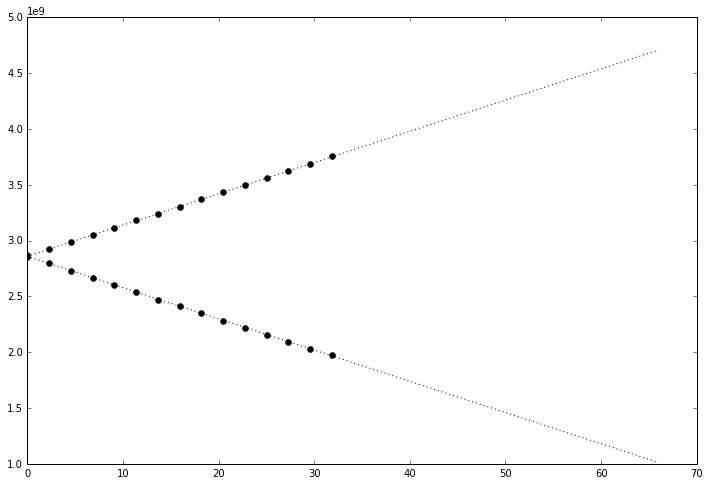

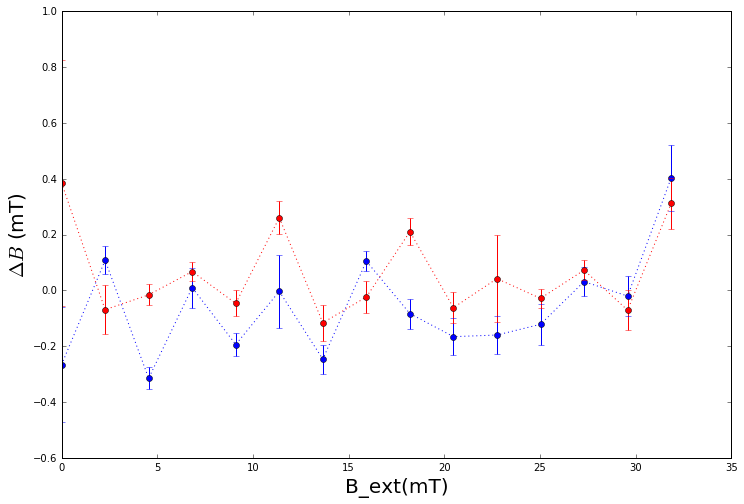

In [180]:
theta = 3*np.pi/180
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\5-30-16\Nabond ND on CPW 5mW scan 1 x102 y72 T-65 d5_1 *V.txt')

bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,3,len(files))*(11/0.5)


freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],12))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:6] = opt
    fits[i,6:] = np.sqrt(np.diag(cov))
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
mins_err = fits[:,7]*mask + fits[:,10]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
maxs_err = fits[:,7]*~mask + fits[:,10]*mask

m = mins_err>10E6
Bs_n = Bs[0:15]
mins = mins[0:15]
mins_err = mins_err[0:15]
m = maxs_err>10E6
Bs_x = Bs[0:15]
maxs = maxs[0:15]
maxs_err = maxs_err[0:15]

b_f = np.hstack((-Bs_n,Bs_x))
f = np.hstack((mins,maxs))

print "Pol. pred: %.2f" % (theta*180/np.pi)

opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,2.865E9])
print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi%180,np.sqrt(np.diag(cov))[0]*180/np.pi%180)
print "diff: %.2f" % ((opt[0]-theta)*180/np.pi%180)
plt.plot(Bs_n,mins,'ko')
plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
plt.plot(Bs_x,maxs,'ko')
plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
plt.show()

#plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
#plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
plt.errorbar(Bs_n,(mins-ODMR_theory(-Bs_n,*opt))/(28E6),
             yerr=mins_err/28E6,marker='o',ls=':',color='b')
plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
             yerr=maxs_err/28E6,marker='o',ls=':',color='r')
plt.xlabel('B_ext(mT)',fontsize=20)
plt.ylabel('$\Delta B$ (mT)',fontsize=20)
plt.show()

Pol. pred: 3.00
ODMR pred: 180.00 +/- 82.09
diff: 177.00


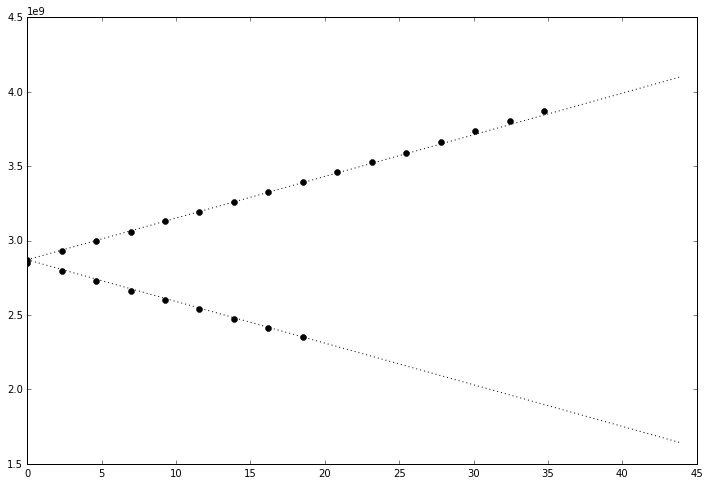

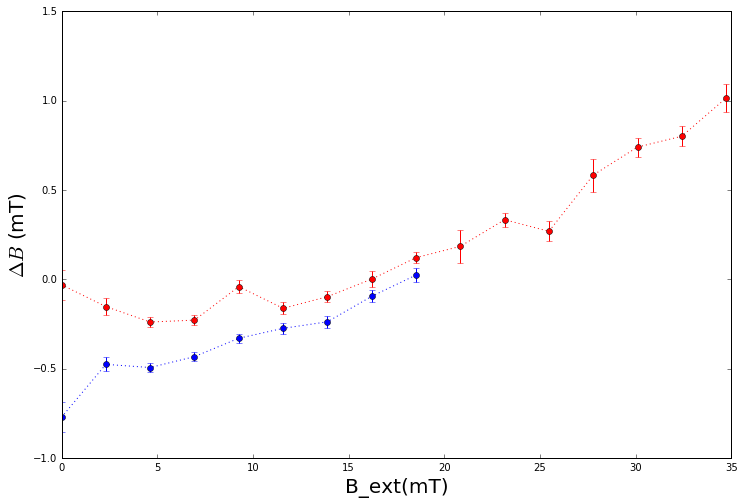

In [184]:
theta = 3*np.pi/180
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\6-8-16\Dot 3 x146 y81 5mW ODMR sweep 2 *V.txt')

bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,2,len(files))*(11/0.5)


freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],12))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:6] = opt
    fits[i,6:] = np.sqrt(np.diag(cov))
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
mins_err = fits[:,7]*mask + fits[:,10]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
maxs_err = fits[:,7]*~mask + fits[:,10]*mask

m = mins_err>10E6
Bs_n = Bs[:9]
mins = mins[:9]
mins_err = mins_err[:9]
m = maxs_err>10E6
Bs_x = Bs[:-4]
maxs = maxs[:-4]
maxs_err = maxs_err[:-4]

b_f = np.hstack((-Bs_n,Bs_x))
f = np.hstack((mins,maxs))

print "Pol. pred: %.2f" % (theta*180/np.pi)

opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,maxs[0]])
print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi%180,np.sqrt(np.diag(cov))[0]*180/np.pi%180)
print "diff: %.2f" % ((opt[0]-theta)*180/np.pi%180)
plt.plot(Bs_n,mins,'ko')
plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
plt.plot(Bs_x,maxs,'ko')
plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
plt.show()

#plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
#plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
plt.errorbar(Bs_n,(mins-ODMR_theory(-Bs_n,*opt))/(28E6),
             yerr=mins_err/28E6,marker='o',ls=':',color='b')
plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
             yerr=maxs_err/28E6,marker='o',ls=':',color='r')
plt.xlabel('B_ext(mT)',fontsize=20)
plt.ylabel('$\Delta B$ (mT)',fontsize=20)
plt.show()

Pol. pred: 3.00
ODMR pred: 141.96 +/- 0.33
diff: 138.96


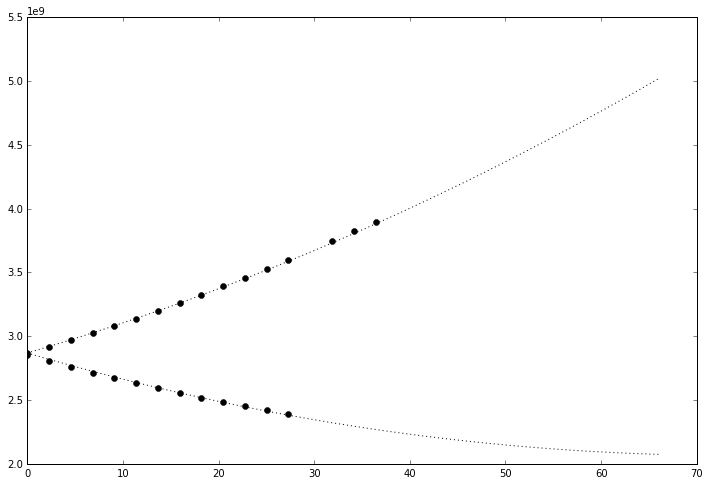

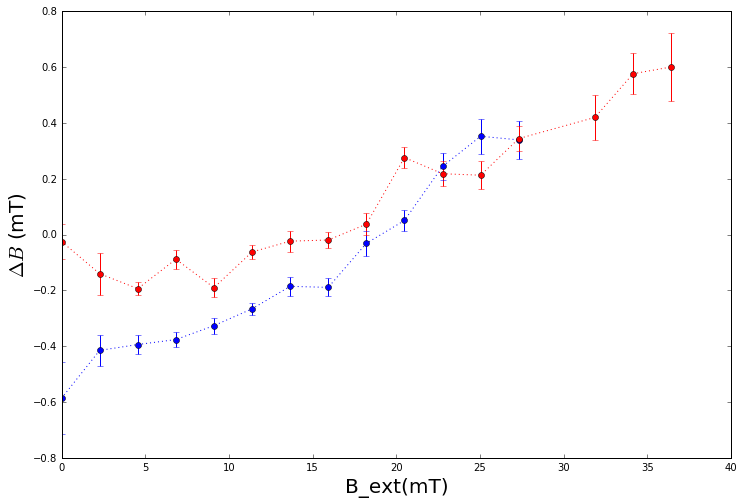

In [189]:
theta = 3*np.pi/180
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\5-25-16\Nabond ND on CPW 10mW ODMR position 2 x127 y50 T21 d2_3*V.txt')

bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,3,len(files))*(11/0.5)


freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],12))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]
    opt, cov = curve_fit(NV.ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:6] = opt
    fits[i,6:] = np.sqrt(np.diag(cov))
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
mins_err = fits[:,7]*mask + fits[:,10]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
maxs_err = fits[:,7]*~mask + fits[:,10]*mask

m = mins_err>10E6
Bs_n = Bs[:13]
mins = mins[:13]
mins_err = mins_err[:13]
m = maxs_err>10E6
Bs_x = Bs[:17][np.arange(len(Bs[:17]))!=13]
maxs = maxs[:17][np.arange(len(Bs[:17]))!=13]
maxs_err = maxs_err[:17][np.arange(len(Bs[:17]))!=13]

b_f = np.hstack((-Bs_n,Bs_x))
f = np.hstack((mins,maxs))

print "Pol. pred: %.2f" % (theta*180/np.pi)

opt,cov = curve_fit(ODMR_theory,b_f,f,p0=[theta,maxs[0]])
print "ODMR pred: %.2f +/- %.2f" % (opt[0]*180/np.pi%180,np.sqrt(np.diag(cov))[0]*180/np.pi%180)
print "diff: %.2f" % ((opt[0]-theta)*180/np.pi%180)
plt.plot(Bs_n,mins,'ko')
plt.plot(Bs,ODMR_theory(-Bs,*opt),'k:')
plt.plot(Bs_x,maxs,'ko')
plt.plot(Bs,ODMR_theory(Bs,*opt),'k:')
plt.show()

#plt.plot(Bs[2:8],(mins[2:8]-ODMR_theory(-Bs[2:8],*opt))/(28E6),'ko:')
#plt.plot(Bs[2:10],(maxs[2:10]-ODMR_theory(Bs[2:10],*opt))/(28E6),'ro:')
plt.errorbar(Bs_n,(mins-ODMR_theory(-Bs_n,*opt))/(28E6),
             yerr=mins_err/28E6,marker='o',ls=':',color='b')
plt.errorbar(Bs_x,(maxs-ODMR_theory(Bs_x,*opt))/(28E6),
             yerr=maxs_err/28E6,marker='o',ls=':',color='r')
plt.xlabel('B_ext(mT)',fontsize=20)
plt.ylabel('$\Delta B$ (mT)',fontsize=20)
plt.show()

In [191]:
180-2*(69+9)

24